# Inception Models

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers as tkl
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar100.load_data()
classes = ["apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle", "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle", "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur", "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard", "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain", "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree", "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket", "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider", "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor", "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"]
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

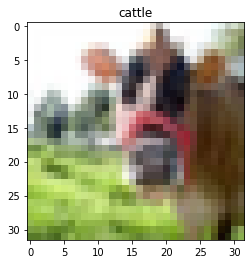

In [3]:
index = 0

plt.imshow(X_train[index])
plt.title(classes[y_train[index]])
plt.show()

In [4]:
X_train = X_train / 255
X_test = X_test / 255

### 1. Inception Network v1

In [5]:
def inception_module(X, x1, x3_reduce, x3, x5_reduce, x5, pool_proj, name = None, initializer = "he_normal"):
    conv2d_1x1 = tkl.Conv2D(x1, kernel_size = (1, 1), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = initializer, bias_initializer = initializer)(X)
    
    conv2d_3x3_reduce = tkl.Conv2D(x3_reduce, kernel_size = (1, 1), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = initializer, bias_initializer = initializer)(X)
    conv2d_3x3 = tkl.Conv2D(x3, kernel_size = (3, 3), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = initializer, bias_initializer = initializer)(conv2d_3x3_reduce)
    
    conv2d_5x5_reduce = tkl.Conv2D(x5_reduce, kernel_size = (1, 1), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = initializer, bias_initializer = initializer)(X)
    conv2d_5x5 = tkl.Conv2D(x5, kernel_size = (1, 1), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = initializer, bias_initializer = initializer)(conv2d_5x5_reduce)
    
    maxpool2d = tkl.MaxPool2D(pool_size = (3, 3), strides = (1, 1), padding = "same")(X)
    pool_proj = tkl.Conv2D(pool_proj, kernel_size = (1, 1), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = initializer, bias_initializer = initializer)(maxpool2d)
    
    output = tkl.Concatenate(axis = 3, name = name)([conv2d_1x1, conv2d_3x3, conv2d_5x5, pool_proj])
    return output

In [8]:
def inception_v1(initializer = "he_normal"):
    input_layer = keras.Input(shape = (32, 32, 3), name = "input_1")
    
    A1 = tkl.Conv2D(64, kernel_size = (7, 7), strides = (2, 2), padding = "same", activation = "relu", name = "conv_1", kernel_initializer = initializer, bias_initializer = initializer)(input_layer)
    P1 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_1")(A1)
        
    I1 = inception_module(P1, 64, 96, 128, 16, 32, 32, "inception_3a", initializer = initializer)
    I2 = inception_module(I1, 128, 128, 192, 32, 96, 64, "inception_3b", initializer = initializer)
    
    P5 = tkl.GlobalAveragePooling2D(name = "pool_5")(I2)
    
    D1 = tkl.Dropout(0.4)(P5)
    F1 = tkl.Flatten()(D1)
    L1 = tkl.Dense(1000, activation = "relu", name = "linear_1", kernel_initializer = initializer, bias_initializer = initializer)(F1)
    output = tkl.Dense(100, activation = "softmax", name = "output", kernel_initializer = initializer, bias_initializer = initializer)(L1)
    
    model = keras.Model(input_layer, output, name = "InceptionV1")
    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(),
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
    return model
    

In [10]:
inception_model_v1 = inception_v1()

In [11]:
history = inception_model_v1.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 25)

Epoch 1/25


2022-10-22 10:28:10.507583: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-22 10:28:11.105939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 3.9032 - accuracy: 0.0960

2022-10-22 10:28:51.437985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 44s 27ms/step - loss: 3.9032 - accuracy: 0.0960 - val_loss: 3.4395 - val_accuracy: 0.1687
Epoch 2/25
1563/1563 [==============================] - 37s 24ms/step - loss: 3.2730 - accuracy: 0.1967 - val_loss: 3.0801 - val_accuracy: 0.2412
Epoch 3/25
1563/1563 [==============================] - 40s 26ms/step - loss: 2.9435 - accuracy: 0.2586 - val_loss: 2.8104 - val_accuracy: 0.2937
Epoch 4/25
1563/1563 [==============================] - 38s 24ms/step - loss: 2.7015 - accuracy: 0.3056 - val_loss: 2.6749 - val_accuracy: 0.3183
Epoch 5/25
1563/1563 [==============================] - 42s 27ms/step - loss: 2.5063 - accuracy: 0.3433 - val_loss: 2.5248 - val_accuracy: 0.3489
Epoch 6/25
1563/1563 [==============================] - 40s 25ms/step - loss: 2.3498 - accuracy: 0.3798 - val_loss: 2.3705 - val_accuracy: 0.3820
Epoch 7/25
1563/1563 [==============================] - 40s 25ms/step - loss: 2.2076 - accuracy: 0.4080 - val_loss: 2.3455 - val_accura

In [12]:
pred = inception_model_v1.predict(X_test)

  1/313 [..............................] - ETA: 1:37

2022-10-22 10:44:15.581045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 7ms/step


In [13]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(pred, axis = 1), 100)

In [2]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (100,70))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()

NameError: name 'pd' is not defined

### 2. Inception Network v2 - Transfer Learning

In [7]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar100.load_data()

reshaped_X_train = list()
reshaped_X_test = list()

for image in range(len(X_train)):
    im = Image.fromarray(X_train[image])
    im = im.resize((96, 96))
    im = im.convert("RGB")
    reshaped_X_train.append(np.array(im))
    print("{}/{}".format(image + 1, len(X_train)), end = "\r")
reshaped_X_train = np.array(reshaped_X_train)
print("\033[92m'TRAIN' dataset reshaped.")

for image in range(len(X_test)):
    im = Image.fromarray(X_test[image])
    im = im.resize((96, 96))
    im = im.convert("RGB")
    reshaped_X_test.append(np.array(im))
    print("{}/{}".format(image + 1, len(X_test)), end = "\r")
reshaped_X_test = np.array(reshaped_X_test)
print("\033[92m'TEST' dataset reshaped.")

'TRAIN' dataset reshaped.


'TEST' dataset reshaped.


In [9]:
base_model = keras.applications.inception_v3.InceptionV3(include_top = False, input_shape = (96, 96, 3))

In [10]:
v2_A1 = tkl.Conv2D(512, kernel_size = (1, 1), strides = (1, 1), padding = "same", activation = "relu")(base_model.output)
v2_D1 = tkl.Dense(512, activation = "relu", name = "dense_1")(v2_A1)
v2_output = tkl.Dense(100, activation = "softmax", name = "output")(v2_D1)

In [11]:
inception_model_v2 = keras.Model(base_model.input, v2_output, name = "InceptionV2")

In [12]:
inception_model_v2.summary()

Model: "InceptionV2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 conv2d_94 (Conv2D)             (None, 47, 47, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 47, 47, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_94 (Activation)     (None, 47, 47, 32)   0           ['batch_normalization_9

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_105 (Batch  (None, 9, 9, 32)    96          ['conv2d_105[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_99 (Activation)     (None, 9, 9, 64)     0           ['batch_normalization_99[0][0]'] 
                                                                                                  
 activation_101 (Activation)    (None, 9, 9, 64)     0           ['batch_normalization_101[0][0]']
                                                                                                  
 activation_104 (Activation)    (None, 9, 9, 96)     0           ['batch_normalization_104[0][0]']
          

                                                                                                  
 conv2d_117 (Conv2D)            (None, 9, 9, 96)     55296       ['activation_116[0][0]']         
                                                                                                  
 batch_normalization_114 (Batch  (None, 9, 9, 48)    144         ['conv2d_114[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_117 (Batch  (None, 9, 9, 96)    288         ['conv2d_117[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_114 (Activation)    (None, 9, 9, 48)     0           ['batch_normalization_114[0][0]']
          

 conv2d_128 (Conv2D)            (None, 4, 4, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_128 (Batch  (None, 4, 4, 128)   384         ['conv2d_128[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_128 (Activation)    (None, 4, 4, 128)    0           ['batch_normalization_128[0][0]']
                                                                                                  
 conv2d_129 (Conv2D)            (None, 4, 4, 128)    114688      ['activation_128[0][0]']         
                                                                                                  
 batch_normalization_129 (Batch  (None, 4, 4, 128)   384         ['conv2d_129[0][0]']             
 Normaliza

 activation_138 (Activation)    (None, 4, 4, 160)    0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_139 (Conv2D)            (None, 4, 4, 160)    179200      ['activation_138[0][0]']         
                                                                                                  
 batch_normalization_139 (Batch  (None, 4, 4, 160)   480         ['conv2d_139[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_139 (Activation)    (None, 4, 4, 160)    0           ['batch_normalization_139[0][0]']
                                                                                                  
 conv2d_135 (Conv2D)            (None, 4, 4, 160)    122880      ['mixed4[0][0]']                 
          

 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 4, 4, 160)    0           ['batch_normalization_149[0][0]']
                                                                                                  
 conv2d_145 (Conv2D)            (None, 4, 4, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_150 (Conv2D)            (None, 4, 4, 160)    179200      ['activation_149[0][0]']         
                                                                                                  
 batch_normalization_145 (Batch  (None, 4, 4, 160)   480         ['conv2d_145[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_160 (Conv2D)            (None, 4, 4, 192)    258048      ['activation_159[0][0]']         
                                                                                                  
 batch_normalization_155 (Batch  (None, 4, 4, 192)   576         ['conv2d_155[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_160 (Batch  (None, 4, 4, 192)   576         ['conv2d_160[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_155 (Activation)    (None, 4, 4, 192)    0           ['batch_normalization_155[0][0]']
          

                                                                                                  
 batch_normalization_168 (Batch  (None, 4, 4, 192)   576         ['conv2d_168[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_164 (Activation)    (None, 4, 4, 192)    0           ['batch_normalization_164[0][0]']
                                                                                                  
 activation_168 (Activation)    (None, 4, 4, 192)    0           ['batch_normalization_168[0][0]']
                                                                                                  
 conv2d_165 (Conv2D)            (None, 1, 1, 320)    552960      ['activation_164[0][0]']         
                                                                                                  
 conv2d_16

 activation_176 (Activation)    (None, 1, 1, 384)    0           ['batch_normalization_176[0][0]']
                                                                                                  
 activation_177 (Activation)    (None, 1, 1, 384)    0           ['batch_normalization_177[0][0]']
                                                                                                  
 batch_normalization_178 (Batch  (None, 1, 1, 192)   576         ['conv2d_178[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_170 (Activation)    (None, 1, 1, 320)    0           ['batch_normalization_170[0][0]']
                                                                                                  
 mixed9_0 (Concatenate)         (None, 1, 1, 768)    0           ['activation_172[0][0]',         
          

                                                                                                  
 activation_179 (Activation)    (None, 1, 1, 320)    0           ['batch_normalization_179[0][0]']
                                                                                                  
 mixed9_1 (Concatenate)         (None, 1, 1, 768)    0           ['activation_181[0][0]',         
                                                                  'activation_182[0][0]']         
                                                                                                  
 concatenate_3 (Concatenate)    (None, 1, 1, 768)    0           ['activation_185[0][0]',         
                                                                  'activation_186[0][0]']         
                                                                                                  
 activation_187 (Activation)    (None, 1, 1, 192)    0           ['batch_normalization_187[0][0]']
          

In [13]:
inception_model_v2.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "rmsprop",
    metrics = ["accuracy"]
)

In [14]:
inception_model_v2.fit(reshaped_X_train, y_train, validation_data = (reshaped_X_test, y_test), epochs = 3)

Epoch 1/3


2022-10-22 10:48:30.337778: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-22 10:48:36.284923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 4.3980 - accuracy: 0.0096

2022-10-22 10:55:02.685041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 405s 237ms/step - loss: 4.3980 - accuracy: 0.0096 - val_loss: 4.3026 - val_accuracy: 0.0104
Epoch 2/3
1563/1563 [==============================] - 286s 182ms/step - loss: 4.1262 - accuracy: 0.0104 - val_loss: 4.1699 - val_accuracy: 0.0111
Epoch 3/3
1563/1563 [==============================] - 315s 201ms/step - loss: 3.8510 - accuracy: 0.0107 - val_loss: 3.9630 - val_accuracy: 0.0120


In [15]:
predictions = inception_model_v2.predict(reshaped_X_test)

2022-10-22 11:05:16.195003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 12s 32ms/step


In [28]:
np.count_nonzero(np.argmax(predictions, axis = 3).flatten() == y_test.flatten()) / len(y_test)

0.0822

In [17]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(predictions, axis = 3).flatten(), 100)

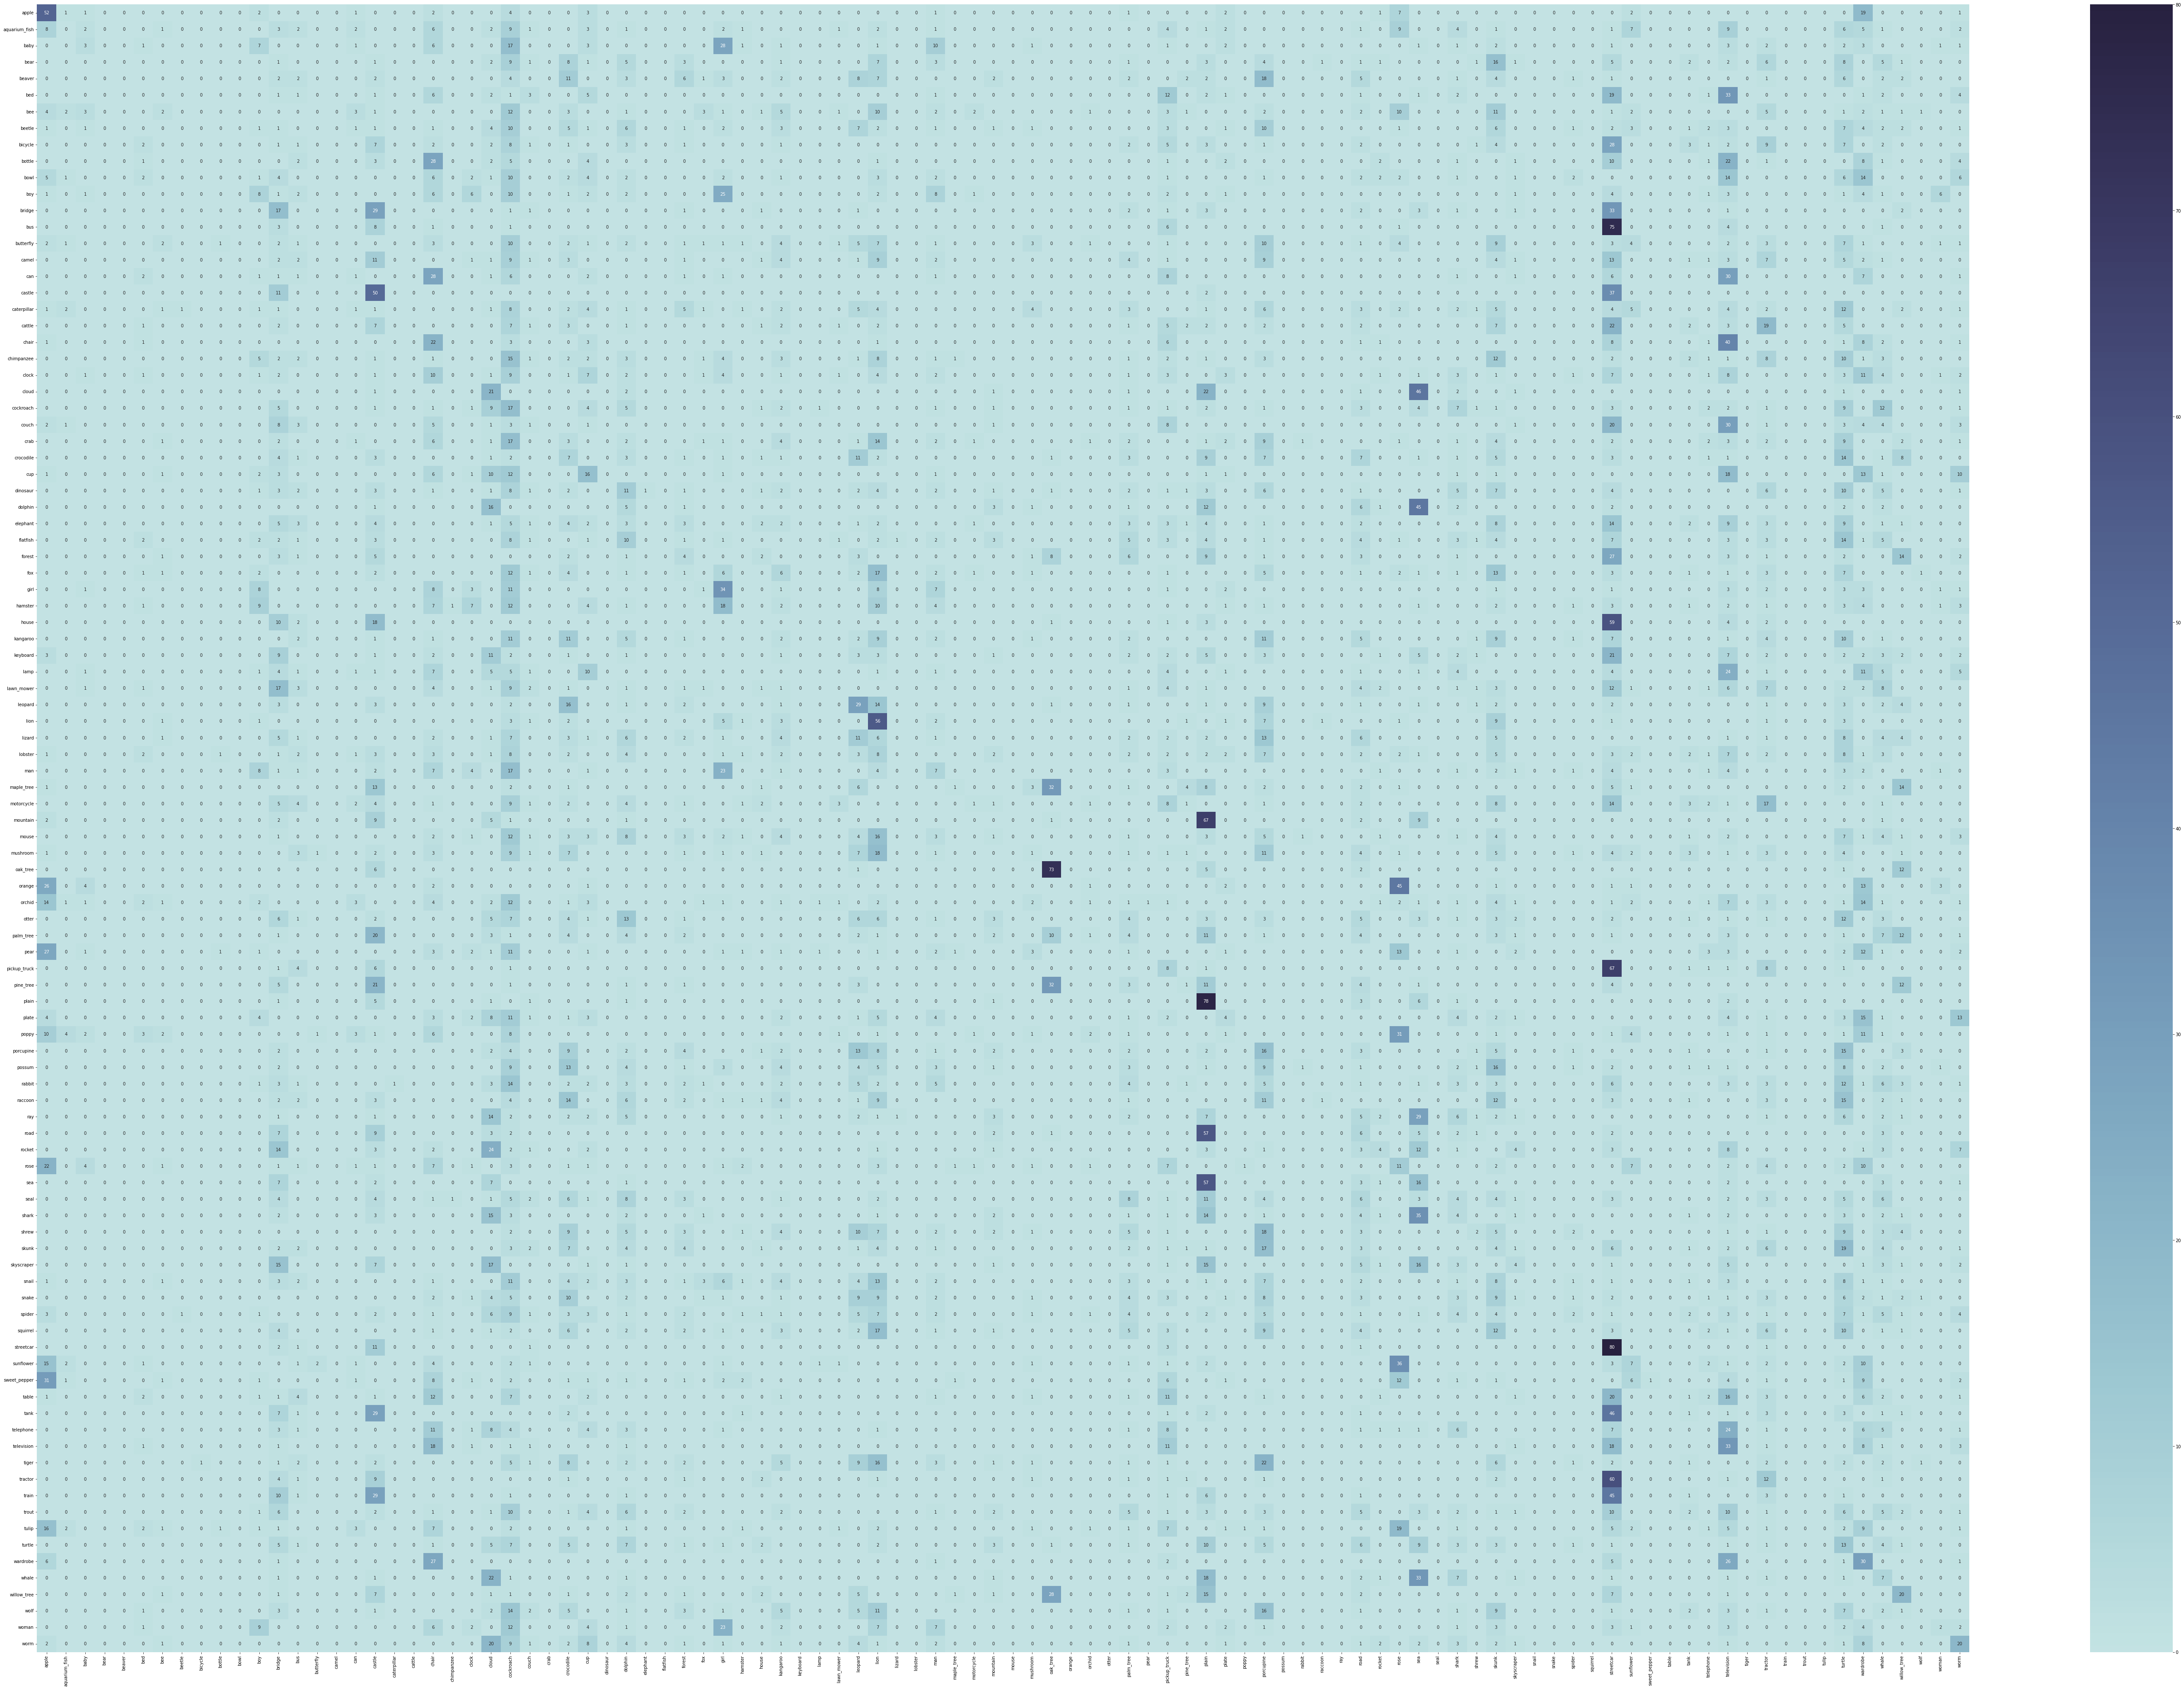

In [29]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (100,70))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()

### 3. Inception Network v3  - Random

In [11]:
random = np.random.randint(100, size = 10000)

In [12]:
print("Random Accuracy =", np.count_nonzero(random == y_test) / 10000)

Random Accuracy = 0.0098


In [13]:
confusion_matrix = tf.math.confusion_matrix(y_test, random, 100)

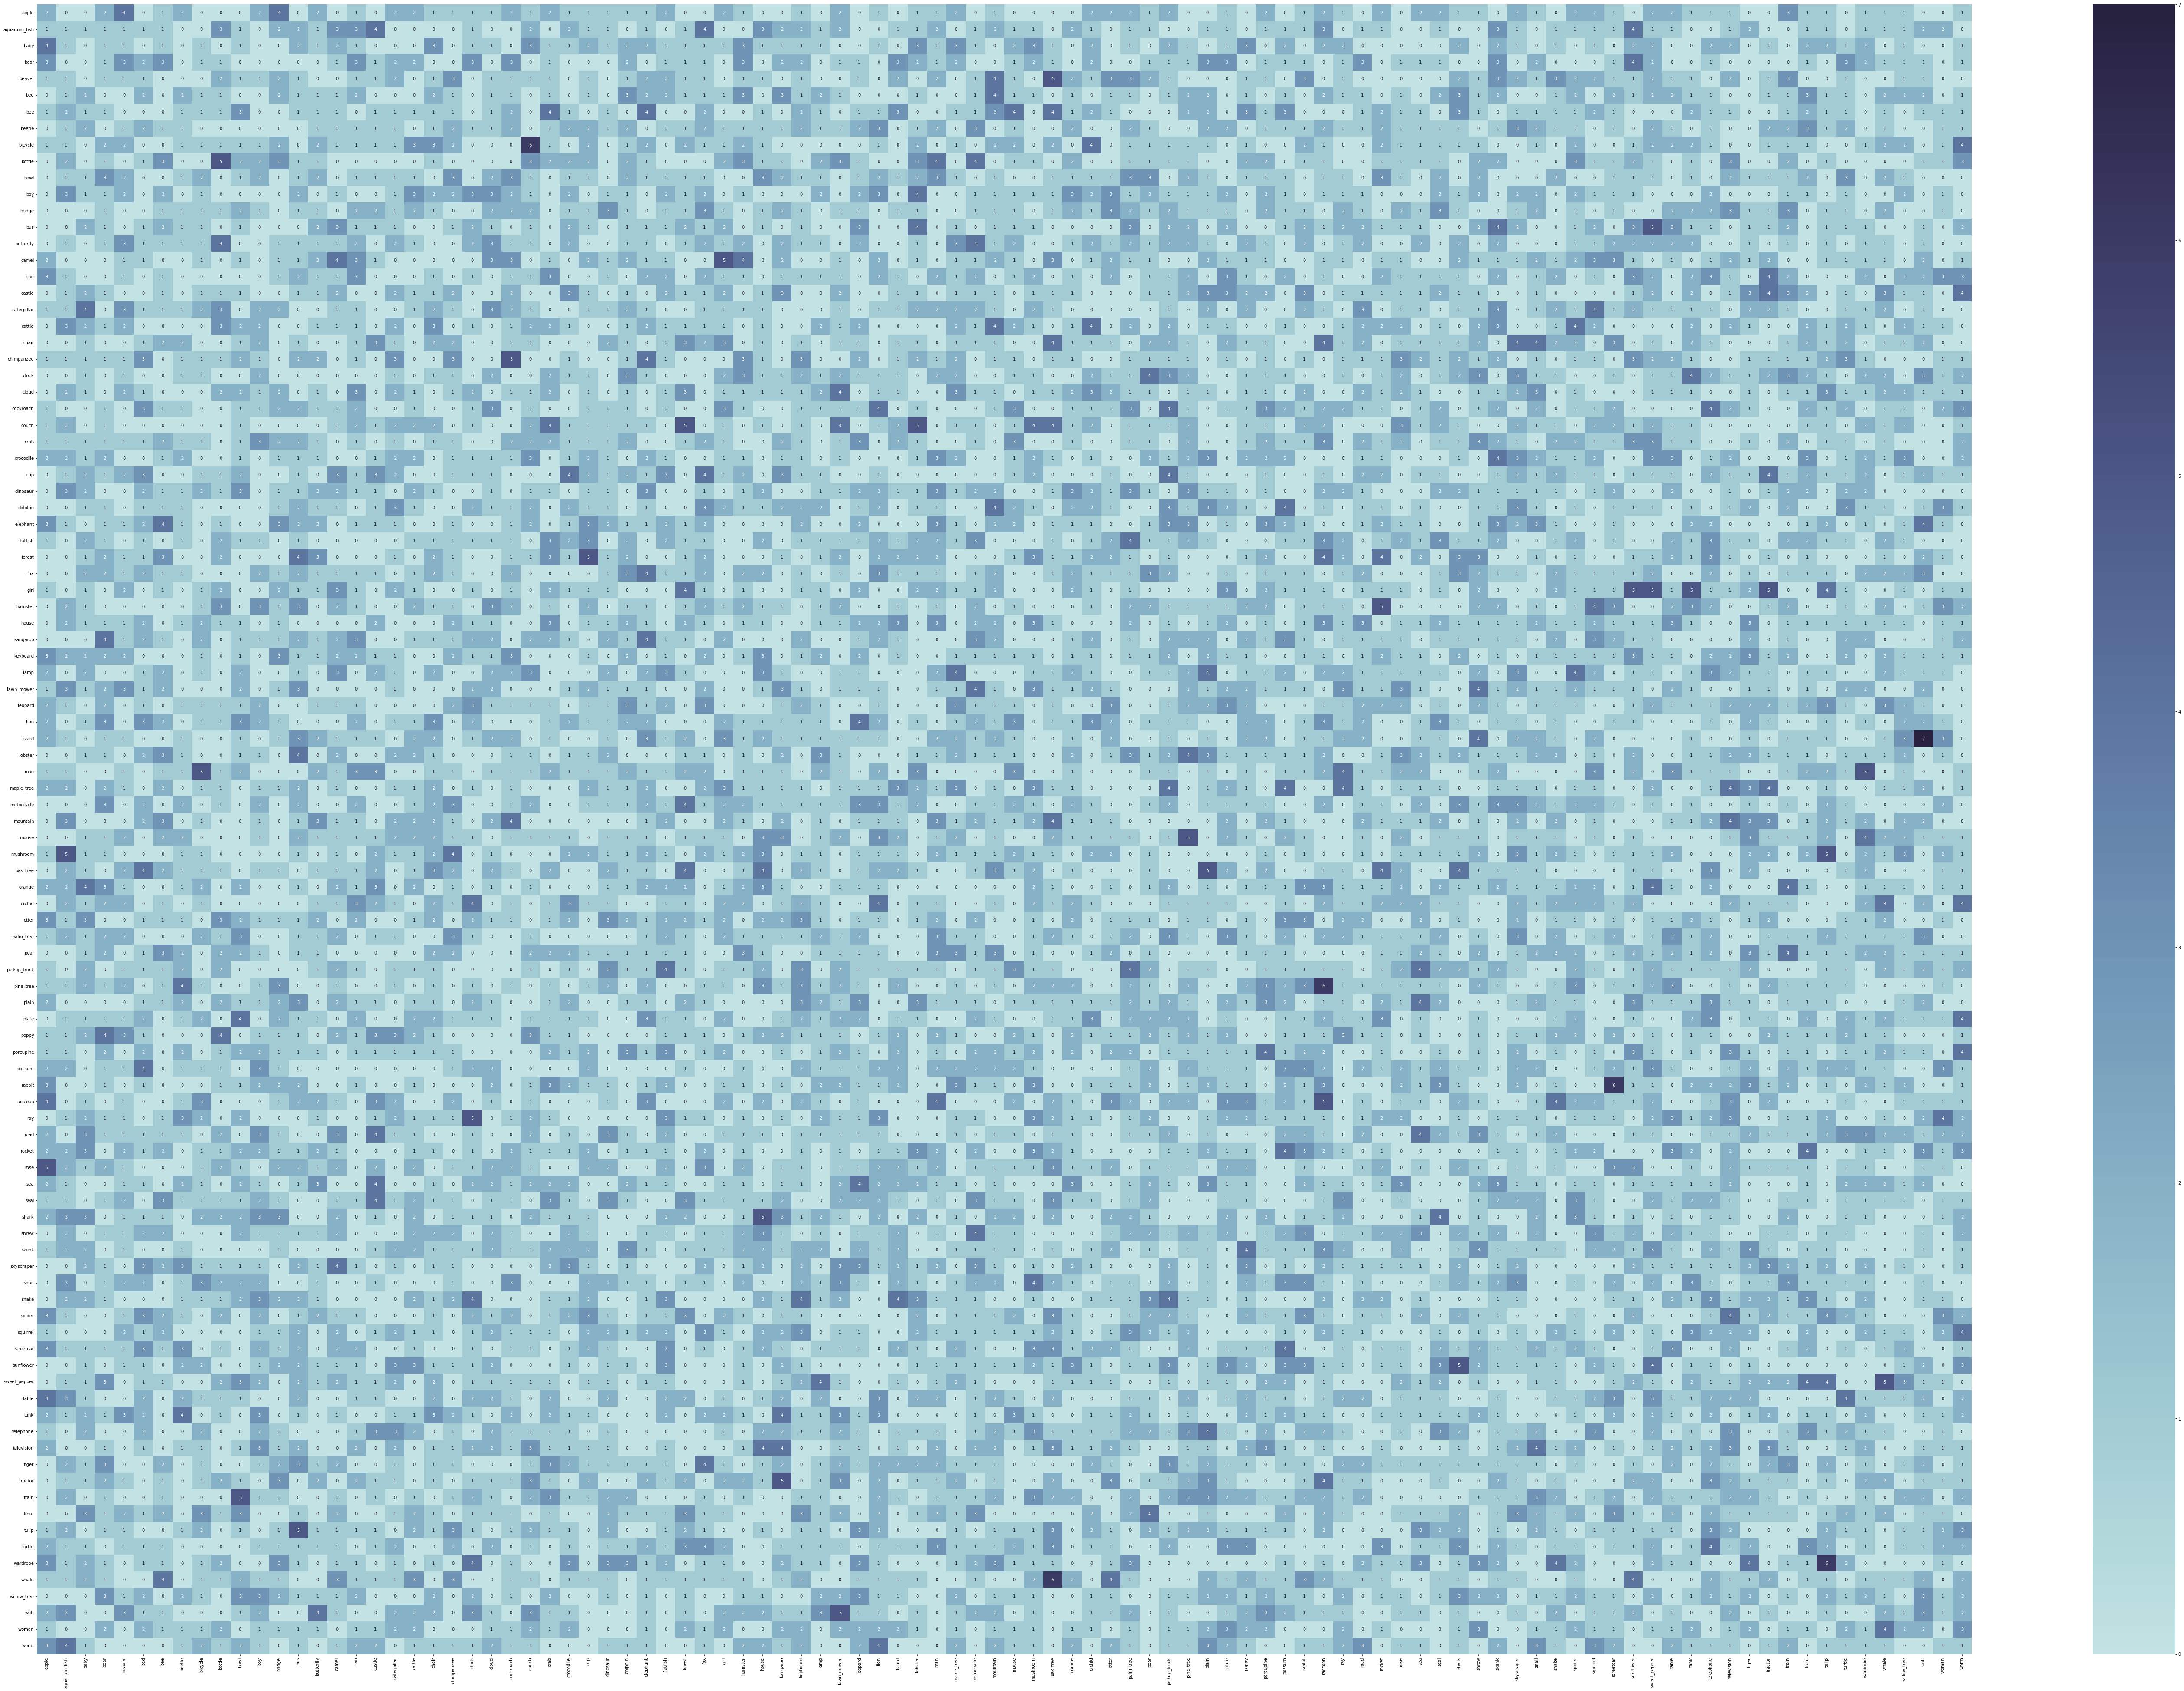

In [14]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (100,70))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()

### 4. Inception Network v4 - 4

In [18]:
def inception_v4(initializer = "he_normal"):
    input_layer = keras.Input(shape = (32, 32, 3), name = "input_1")
    
    A1 = tkl.Conv2D(64, kernel_size = (7, 7), strides = (2, 2), padding = "same", activation = "relu", name = "conv_1", kernel_initializer = initializer, bias_initializer = initializer)(input_layer)
    P1 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_1")(A1)
        
    I1 = inception_module(P1, 64, 96, 128, 16, 32, 32, "inception_3a", initializer = initializer)
    I2 = inception_module(I1, 128, 128, 192, 32, 96, 64, "inception_3b", initializer = initializer)
    
    P2 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_2")(I2)
    
    I3 = inception_module(P2, 192, 96, 208, 16, 48, 64, "inception_4a", initializer = initializer)
    I4 = inception_module(I3, 160, 112, 224, 24, 64, 64, "inception_4b", initializer = initializer)
    
    P3 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_3")(I4)
    
    P5 = tkl.GlobalAveragePooling2D(name = "pool_5")(P3)
    
    D1 = tkl.Dropout(0.4)(P5)
    F1 = tkl.Flatten()(D1)
    L1 = tkl.Dense(512, activation = "relu", name = "linear_1", kernel_initializer = initializer, bias_initializer = initializer)(F1)
    output = tkl.Dense(100, activation = "softmax", name = "output", kernel_initializer = initializer, bias_initializer = initializer)(L1)
    
    model = keras.Model(input_layer, output, name = "InceptionV1")
    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(),
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
    return model

In [19]:
inception_model_v4 = inception_v4()

In [20]:
history_v4 = inception_model_v4.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50)

Epoch 1/50


2022-10-22 11:39:13.823892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 4.0221 - accuracy: 0.0771

2022-10-22 11:40:07.511011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 59s 36ms/step - loss: 4.0221 - accuracy: 0.0771 - val_loss: 3.6479 - val_accuracy: 0.1356
Epoch 2/50
1563/1563 [==============================] - 52s 33ms/step - loss: 3.4391 - accuracy: 0.1655 - val_loss: 3.1813 - val_accuracy: 0.2145
Epoch 3/50
1563/1563 [==============================] - 52s 33ms/step - loss: 3.0958 - accuracy: 0.2272 - val_loss: 2.9817 - val_accuracy: 0.2592
Epoch 4/50
1563/1563 [==============================] - 52s 33ms/step - loss: 2.8708 - accuracy: 0.2731 - val_loss: 2.9098 - val_accuracy: 0.2702
Epoch 5/50
1563/1563 [==============================] - 52s 33ms/step - loss: 2.6948 - accuracy: 0.3103 - val_loss: 2.6688 - val_accuracy: 0.3196
Epoch 6/50
1563/1563 [==============================] - 52s 33ms/step - loss: 2.5513 - accuracy: 0.3370 - val_loss: 2.7344 - val_accuracy: 0.3094
Epoch 7/50
1563/1563 [==============================] - 53s 34ms/step - loss: 2.4124 - accuracy: 0.3665 - val_loss: 2.5938 - val_accura

KeyboardInterrupt: 

In [21]:
history_v4 = inception_model_v4.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 40)

Epoch 1/40
1563/1563 [==============================] - 53s 34ms/step - loss: 2.0114 - accuracy: 0.4518 - val_loss: 2.4653 - val_accuracy: 0.3762
Epoch 2/40
1563/1563 [==============================] - 52s 33ms/step - loss: 1.9393 - accuracy: 0.4685 - val_loss: 2.4919 - val_accuracy: 0.3715
Epoch 3/40
1563/1563 [==============================] - 52s 33ms/step - loss: 1.8846 - accuracy: 0.4810 - val_loss: 2.4481 - val_accuracy: 0.3797
Epoch 4/40
1563/1563 [==============================] - 51s 33ms/step - loss: 1.8335 - accuracy: 0.4907 - val_loss: 2.5078 - val_accuracy: 0.3779
Epoch 5/40
1563/1563 [==============================] - 51s 33ms/step - loss: 1.7845 - accuracy: 0.5013 - val_loss: 2.5658 - val_accuracy: 0.3651
Epoch 6/40
1563/1563 [==============================] - 53s 34ms/step - loss: 1.7377 - accuracy: 0.5120 - val_loss: 2.5252 - val_accuracy: 0.3764
Epoch 7/40
1563/1563 [==============================] - 52s 33ms/step - loss: 1.6993 - accuracy: 0.5215 - val_loss: 2.5167 -

KeyboardInterrupt: 

In [22]:
history_v4 = inception_model_v4.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 19)

Epoch 1/19
1563/1563 [==============================] - 54s 34ms/step - loss: 1.4397 - accuracy: 0.5855 - val_loss: 2.7268 - val_accuracy: 0.3729
Epoch 2/19
1563/1563 [==============================] - 53s 34ms/step - loss: 1.4238 - accuracy: 0.5895 - val_loss: 2.7501 - val_accuracy: 0.3737
Epoch 3/19
1563/1563 [==============================] - 52s 33ms/step - loss: 1.4243 - accuracy: 0.5889 - val_loss: 2.7328 - val_accuracy: 0.3790
Epoch 4/19
1563/1563 [==============================] - 53s 34ms/step - loss: 1.4158 - accuracy: 0.5931 - val_loss: 2.7449 - val_accuracy: 0.3788
Epoch 5/19
1563/1563 [==============================] - 52s 33ms/step - loss: 1.4144 - accuracy: 0.5928 - val_loss: 2.8374 - val_accuracy: 0.3641
Epoch 6/19
1563/1563 [==============================] - 52s 33ms/step - loss: 1.4219 - accuracy: 0.5962 - val_loss: 2.7576 - val_accuracy: 0.3687
Epoch 7/19
1563/1563 [==============================] - 52s 33ms/step - loss: 1.3943 - accuracy: 0.5978 - val_loss: 2.7663 -

In [23]:
predictions = inception_model_v4.predict(X_test)

2022-10-22 14:47:59.085192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 10ms/step


In [24]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(predictions, axis = 1), 100)

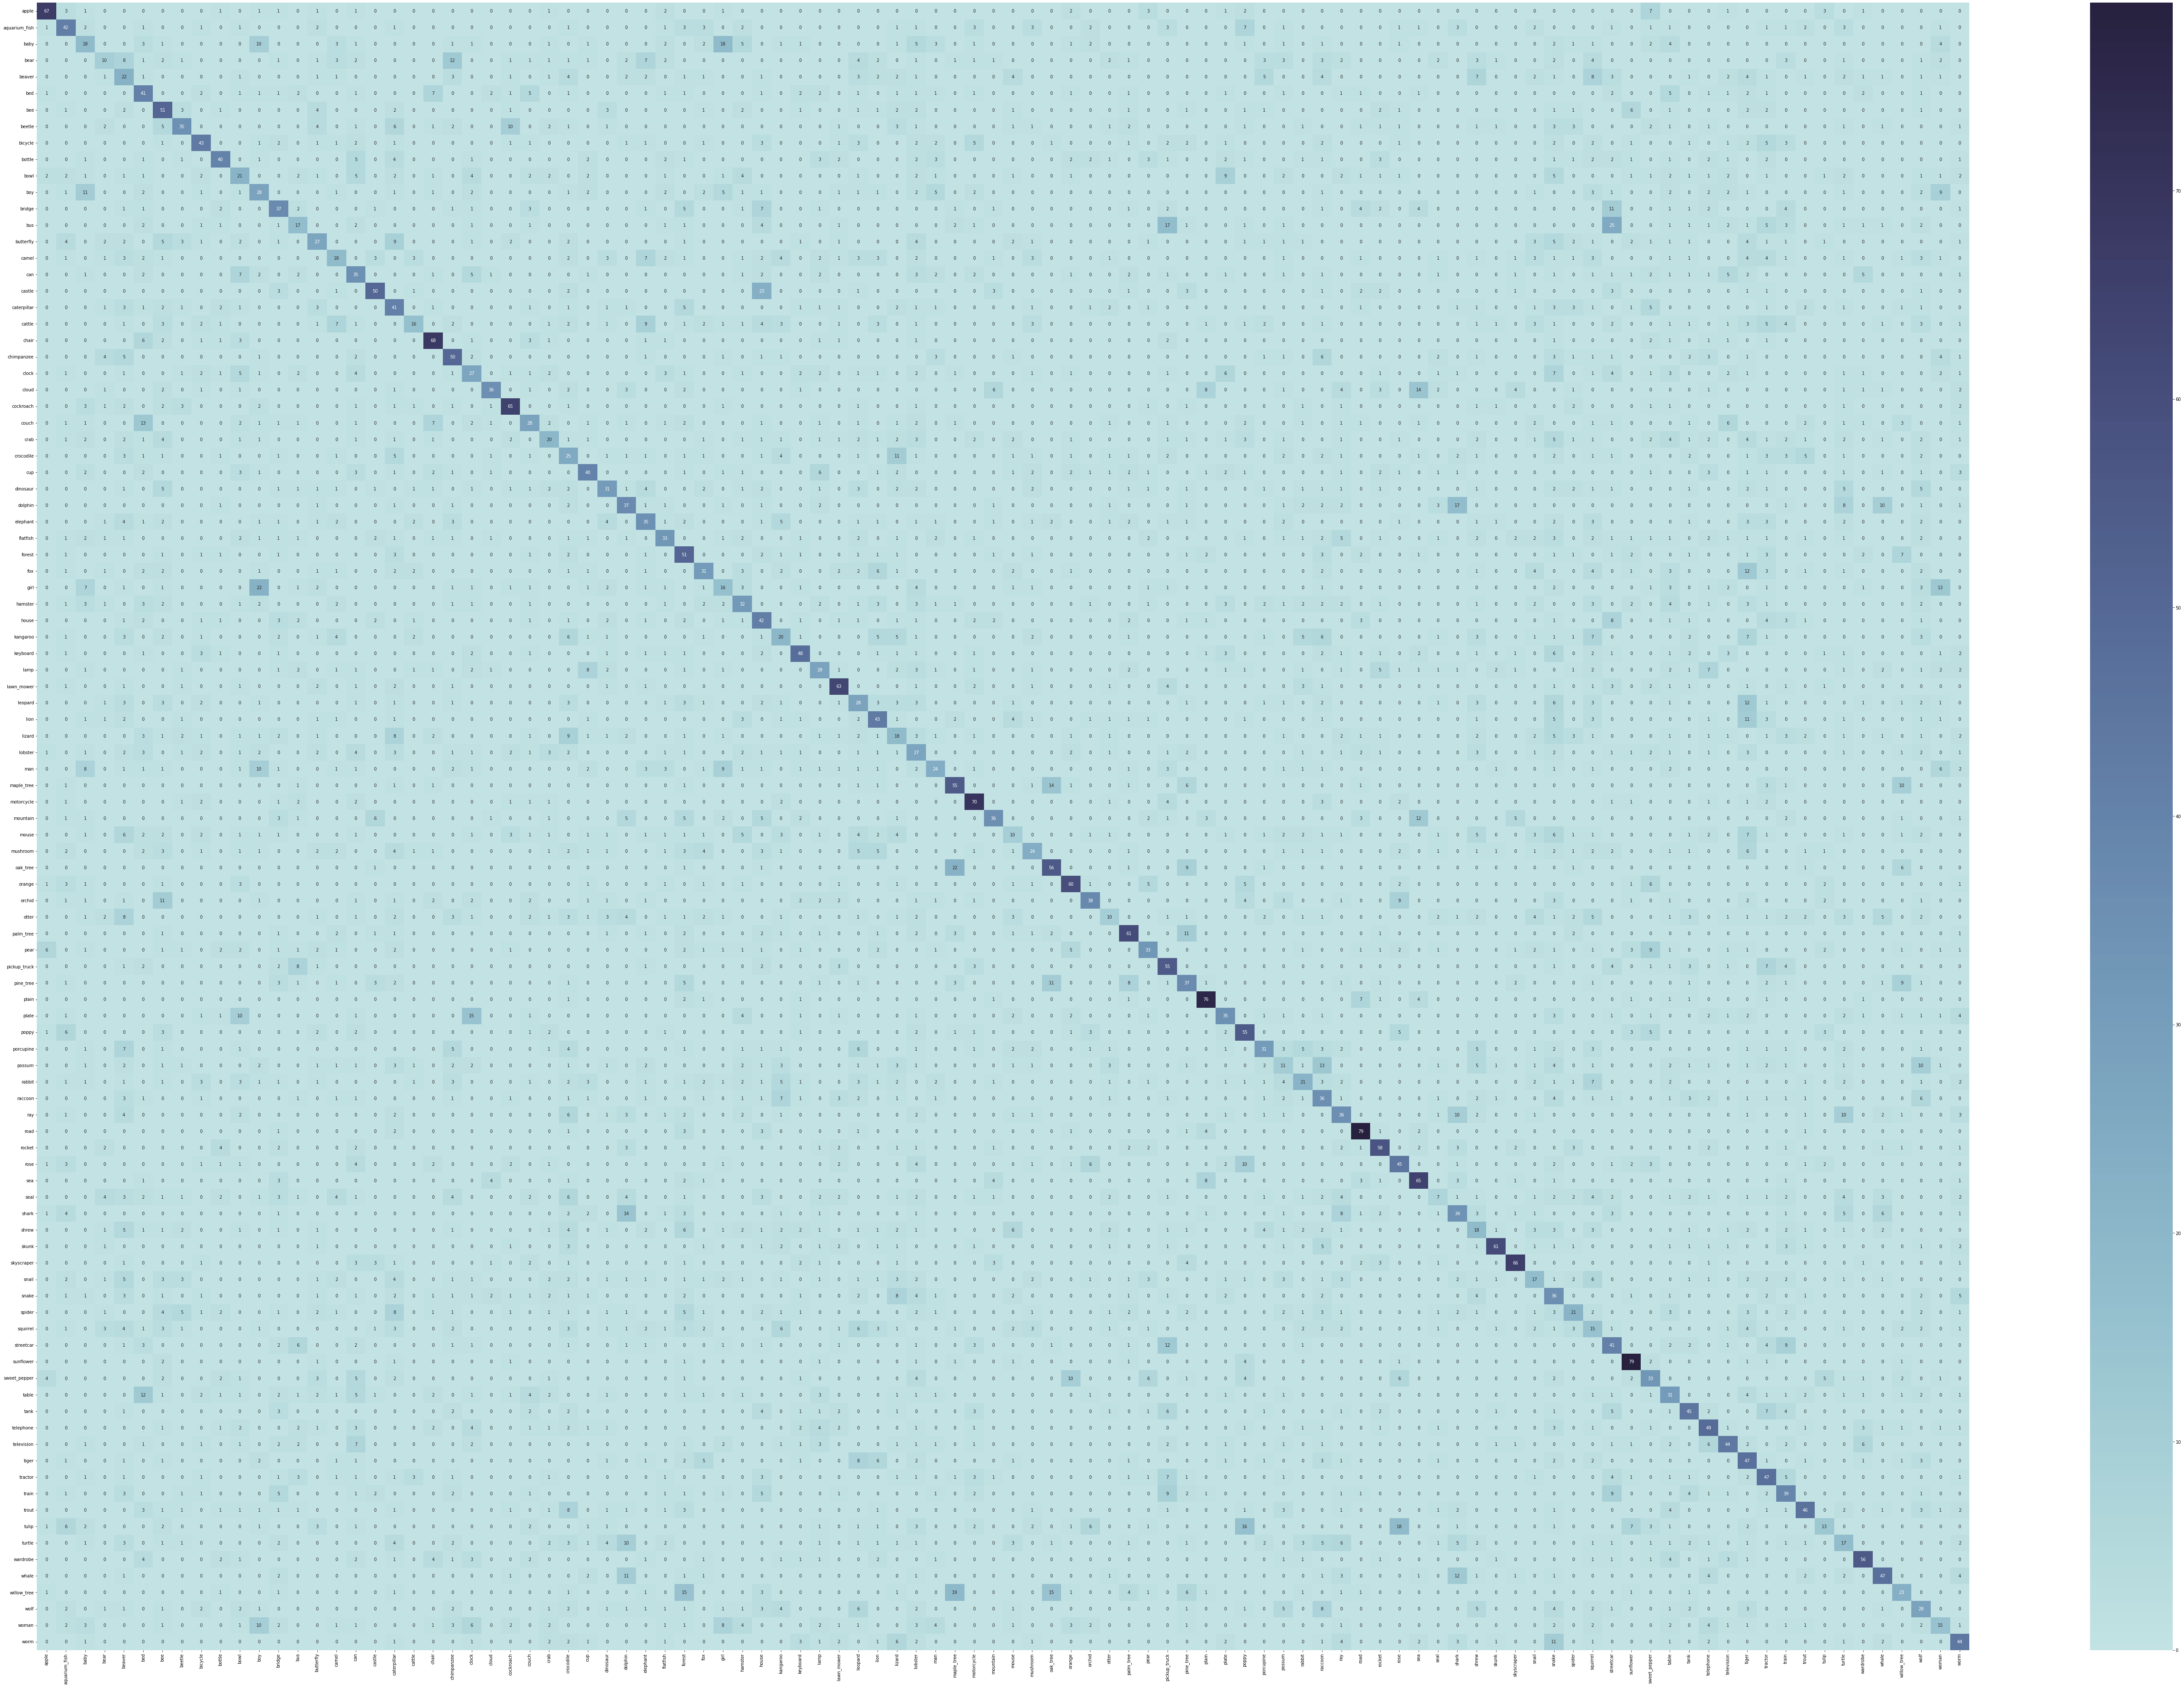

In [26]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (100,70))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()

### 5. Inception v5 - 6

In [6]:
def inception_v5(initializer = "he_normal"):
    input_layer = keras.Input(shape = (32, 32, 3), name = "input_1")
    
    A1 = tkl.Conv2D(64, kernel_size = (7, 7), strides = (2, 2), padding = "same", activation = "relu", name = "conv_1", kernel_initializer = initializer, bias_initializer = initializer)(input_layer)
    P1 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_1")(A1)
        
    I1 = inception_module(P1, 64, 96, 128, 16, 32, 32, "inception_3a", initializer = initializer)
    I2 = inception_module(I1, 128, 128, 192, 32, 96, 64, "inception_3b", initializer = initializer)
    
    P2 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_2")(I2)
    
    I3 = inception_module(P2, 192, 96, 208, 16, 48, 64, "inception_4a", initializer = initializer)
    I4 = inception_module(I3, 160, 112, 224, 24, 64, 64, "inception_4b", initializer = initializer)
    
    P3 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_3")(I4)
    
    I5 = inception_module(P3, 128, 128, 256, 24, 64, 64, "inception_4c", initializer = initializer)
    I6 = inception_module(I5, 112, 144, 288, 32, 64, 64, "inception_4d", initializer = initializer)
    
    P4 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_4")(I6)
    
    P5 = tkl.GlobalAveragePooling2D(name = "pool_5")(P4)
    
    D1 = tkl.Dropout(0.4)(P5)
    F1 = tkl.Flatten()(D1)
    L1 = tkl.Dense(512, activation = "relu", name = "linear_1", kernel_initializer = initializer, bias_initializer = initializer)(F1)
    output = tkl.Dense(100, activation = "softmax", name = "output", kernel_initializer = initializer, bias_initializer = initializer)(L1)
    
    model = keras.Model(input_layer, output, name = "InceptionV1")
    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(),
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
    return model

In [7]:
inception_model_v5 = inception_v5()

Metal device set to: Apple M1 Pro


2022-10-22 15:24:06.486364: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-22 15:24:06.486625: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
history_v5 = inception_model_v5.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50)

Epoch 1/50


2022-10-22 15:24:08.155655: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-22 15:24:09.186181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 4.2172 - accuracy: 0.0435

2022-10-22 15:25:06.555297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 62s 38ms/step - loss: 4.2172 - accuracy: 0.0435 - val_loss: 3.8741 - val_accuracy: 0.0863
Epoch 2/50
1563/1563 [==============================] - 51s 33ms/step - loss: 3.7067 - accuracy: 0.1100 - val_loss: 3.5085 - val_accuracy: 0.1491
Epoch 3/50
1563/1563 [==============================] - 55s 35ms/step - loss: 3.4246 - accuracy: 0.1608 - val_loss: 3.2813 - val_accuracy: 0.1943
Epoch 4/50
1563/1563 [==============================] - 65s 42ms/step - loss: 3.2079 - accuracy: 0.2046 - val_loss: 3.1523 - val_accuracy: 0.2201
Epoch 5/50
1563/1563 [==============================] - 56s 36ms/step - loss: 3.0404 - accuracy: 0.2355 - val_loss: 3.0088 - val_accuracy: 0.2459
Epoch 6/50
1563/1563 [==============================] - 53s 34ms/step - loss: 2.9035 - accuracy: 0.2658 - val_loss: 2.9431 - val_accuracy: 0.2641
Epoch 7/50
1563/1563 [==============================] - 54s 34ms/step - loss: 2.7982 - accuracy: 0.2898 - val_loss: 2.8639 - val_accura

In [9]:
predictions = inception_model_v5.predict(X_test)

2022-10-22 16:13:07.053034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 11ms/step


In [10]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(predictions, axis = 1), 100)

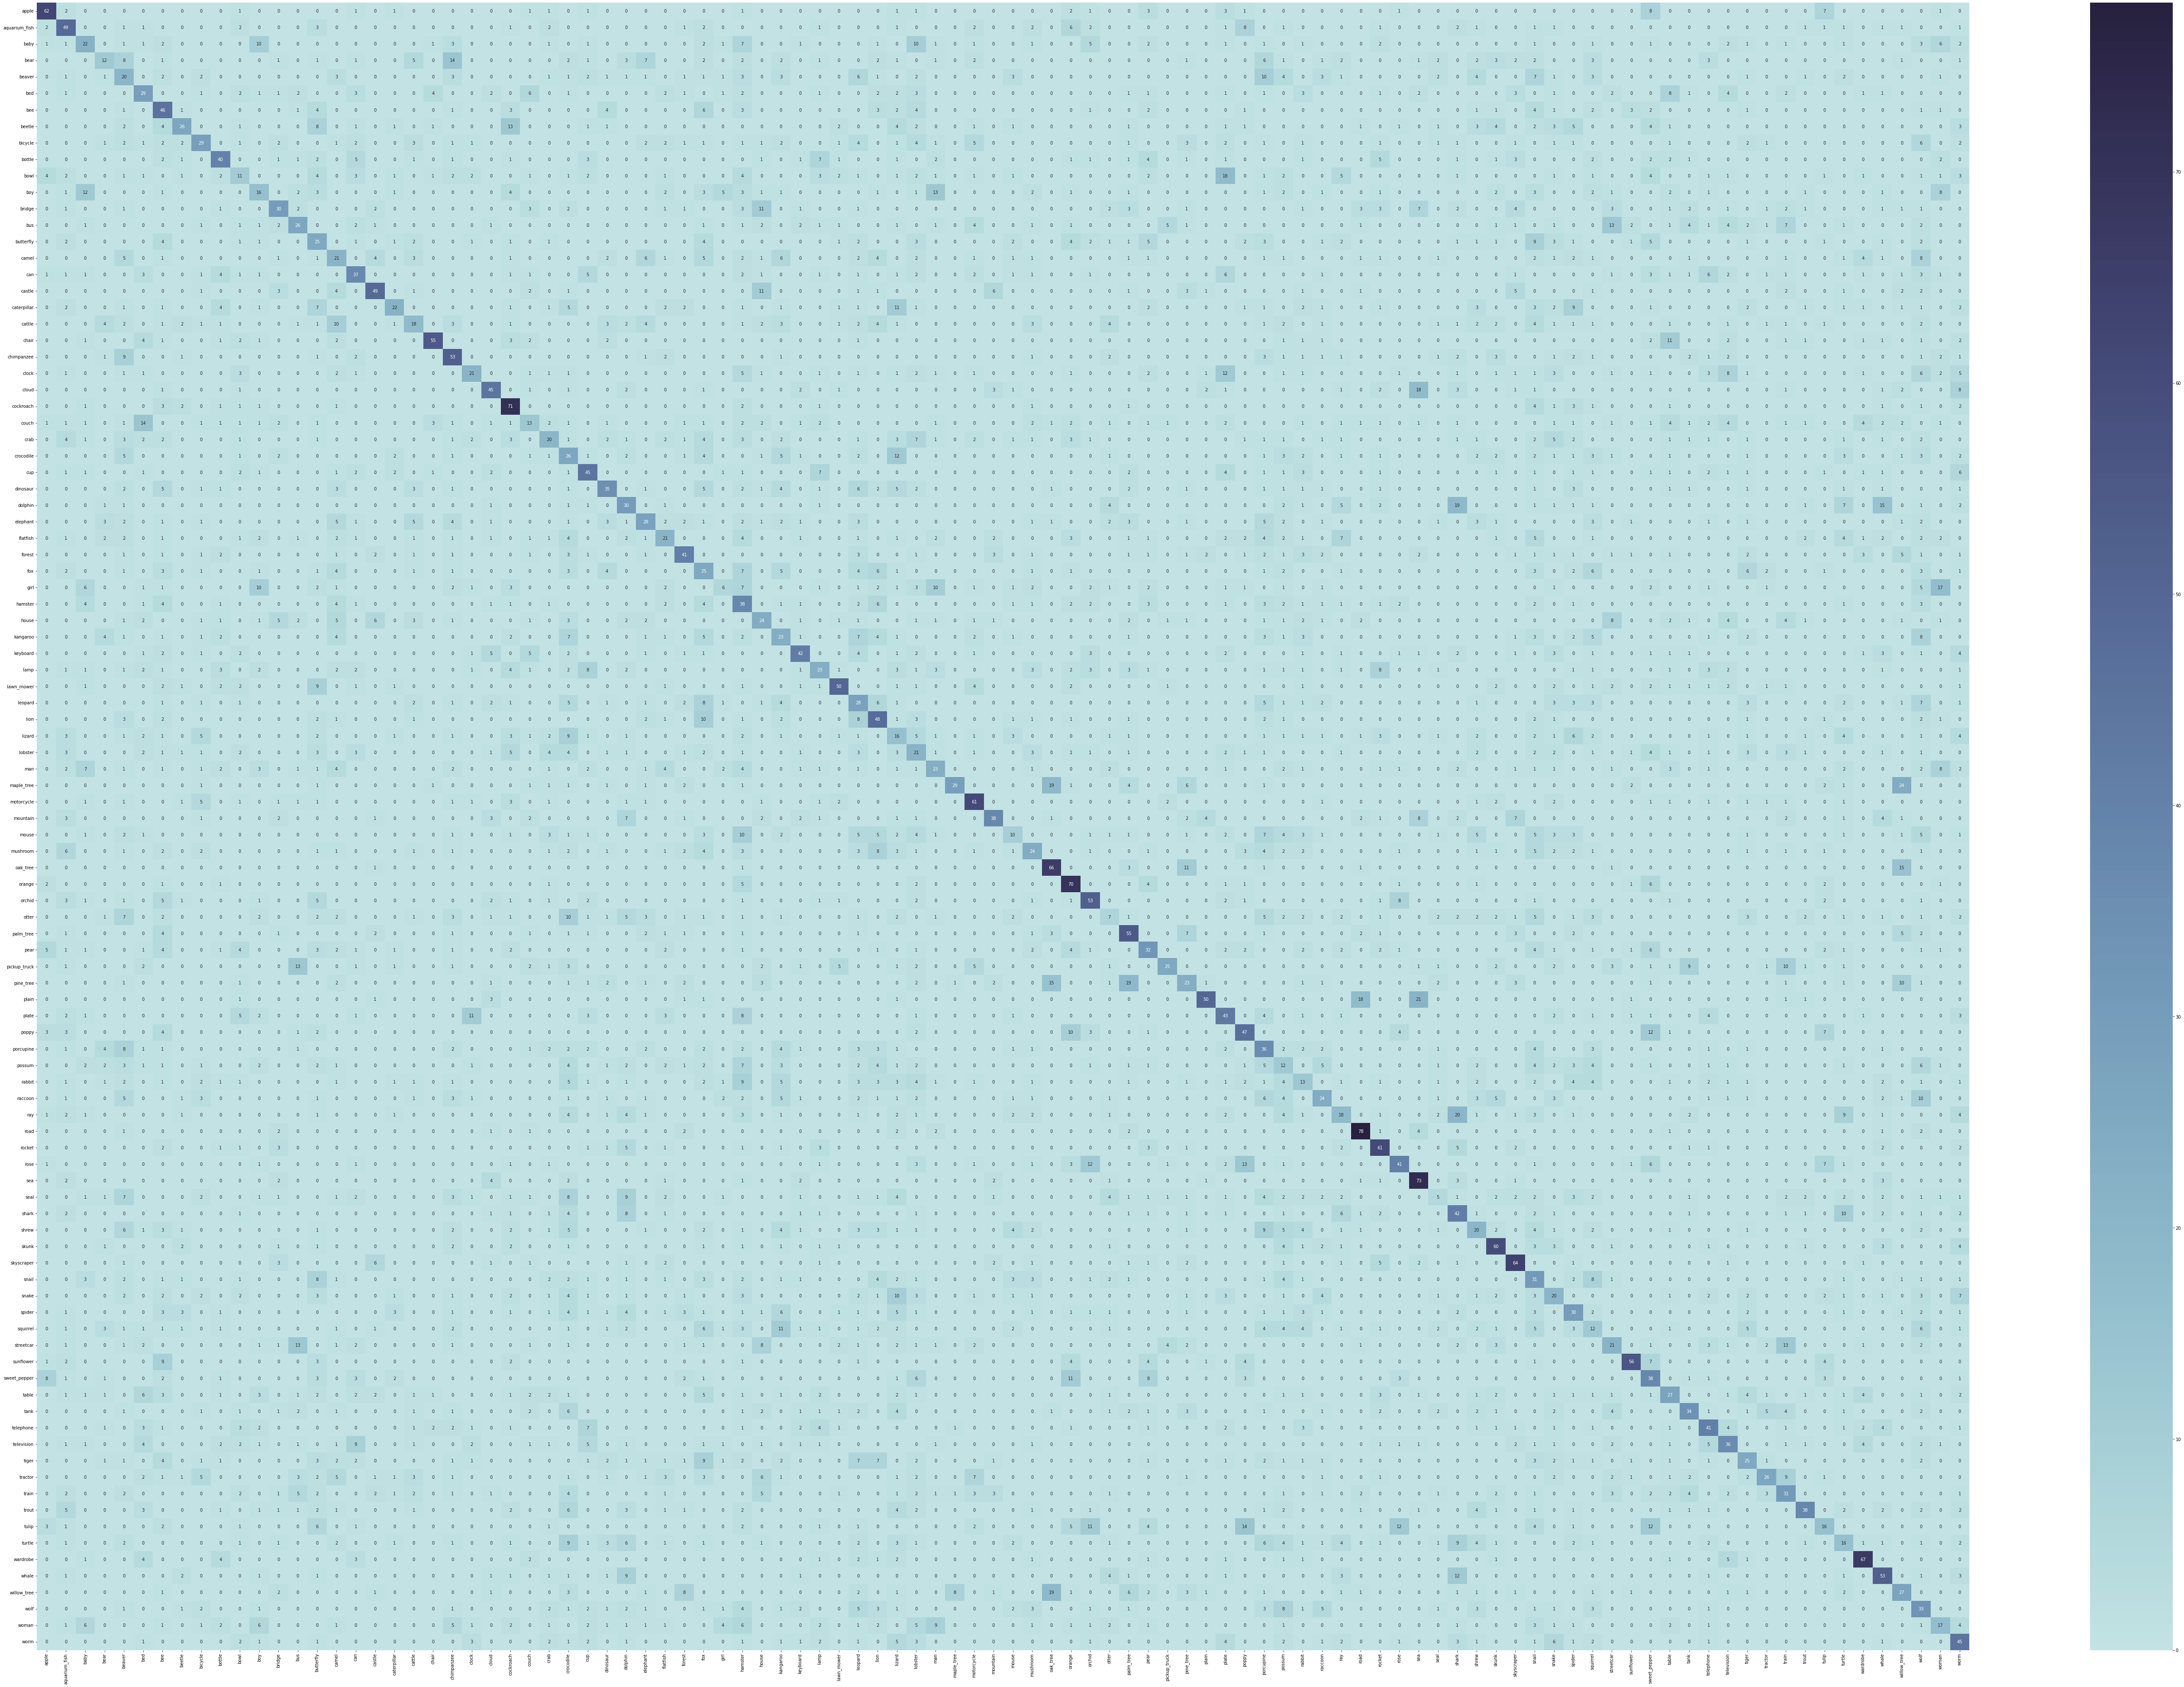

In [12]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (100,70))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()

### 6. Inception v6 - 9

In [6]:
def inception_v6(initializer = "he_normal"):
    input_layer = keras.Input(shape = (32, 32, 3), name = "input_1")
    
    A1 = tkl.Conv2D(64, kernel_size = (7, 7), strides = (2, 2), padding = "same", activation = "relu", name = "conv_1", kernel_initializer = initializer, bias_initializer = initializer)(input_layer)
    P1 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_1")(A1)
        
    I1 = inception_module(P1, 64, 96, 128, 16, 32, 32, "inception_3a", initializer = initializer)
    I2 = inception_module(I1, 128, 128, 192, 32, 96, 64, "inception_3b", initializer = initializer)
    
    P2 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_2")(I2)
    
    I3 = inception_module(P2, 192, 96, 208, 16, 48, 64, "inception_4a", initializer = initializer)
    I4 = inception_module(I3, 160, 112, 224, 24, 64, 64, "inception_4b", initializer = initializer)
    I5 = inception_module(I4, 128, 128, 256, 24, 64, 64, "inception_4c", initializer = initializer)
    I6 = inception_module(I5, 112, 144, 288, 32, 64, 64, "inception_4d", initializer = initializer)
    I7 = inception_module(I6, 256, 160, 320, 32, 128, 128, "inception_4e", initializer = initializer)
    
    P4 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_3")(I7)
    
    I8 = inception_module(P4, 256, 160, 320, 32, 128, 128, "inception_5a", initializer = initializer)
    I9 = inception_module(I8, 384, 192, 384, 48, 128, 128, "inception_5b", initializer = initializer)
    
    P5 = tkl.GlobalAveragePooling2D(name = "pool_5")(I9)
    
    D1 = tkl.Dropout(0.4)(P5)
    F1 = tkl.Flatten()(D1)
    L1 = tkl.Dense(512, activation = "relu", name = "linear_1", kernel_initializer = initializer, bias_initializer = initializer)(F1)
    output = tkl.Dense(100, activation = "softmax", name = "output", kernel_initializer = initializer, bias_initializer = initializer)(L1)
    
    model = keras.Model(input_layer, output, name = "InceptionV1")
    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(),
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
    return model

In [7]:
inception_model_v6 = inception_v6()

Metal device set to: Apple M1 Pro


2022-10-22 16:14:26.583143: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-22 16:14:26.583279: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
history_v6 = inception_model_v6.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50)

Epoch 1/50


2022-10-22 16:14:28.605295: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-22 16:14:29.912633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 4.6158 - accuracy: 0.0095

2022-10-22 16:15:38.404403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 75s 46ms/step - loss: 4.6158 - accuracy: 0.0095 - val_loss: 4.6071 - val_accuracy: 0.0100
Epoch 2/50
1563/1563 [==============================] - 68s 44ms/step - loss: 4.6085 - accuracy: 0.0104 - val_loss: 4.6067 - val_accuracy: 0.0100
Epoch 3/50
1563/1563 [==============================] - 69s 44ms/step - loss: 4.6076 - accuracy: 0.0090 - val_loss: 4.6058 - val_accuracy: 0.0100
Epoch 4/50
1563/1563 [==============================] - 71s 45ms/step - loss: 4.6073 - accuracy: 0.0089 - val_loss: 4.6056 - val_accuracy: 0.0100
Epoch 5/50
1563/1563 [==============================] - 71s 46ms/step - loss: 4.6067 - accuracy: 0.0091 - val_loss: 4.6055 - val_accuracy: 0.0100
Epoch 6/50
1563/1563 [==============================] - 70s 45ms/step - loss: 4.6064 - accuracy: 0.0097 - val_loss: 4.6054 - val_accuracy: 0.0100
Epoch 7/50
1563/1563 [==============================] - 70s 45ms/step - loss: 4.6064 - accuracy: 0.0099 - val_loss: 4.6055 - val_accura

In [9]:
max(history_v6.history["val_accuracy"])

0.010000000707805157

In [10]:
predictions = inception_model_v6.predict(X_test)

2022-10-22 17:14:33.728284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 5s 14ms/step


In [11]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(predictions, axis = 1), 100)

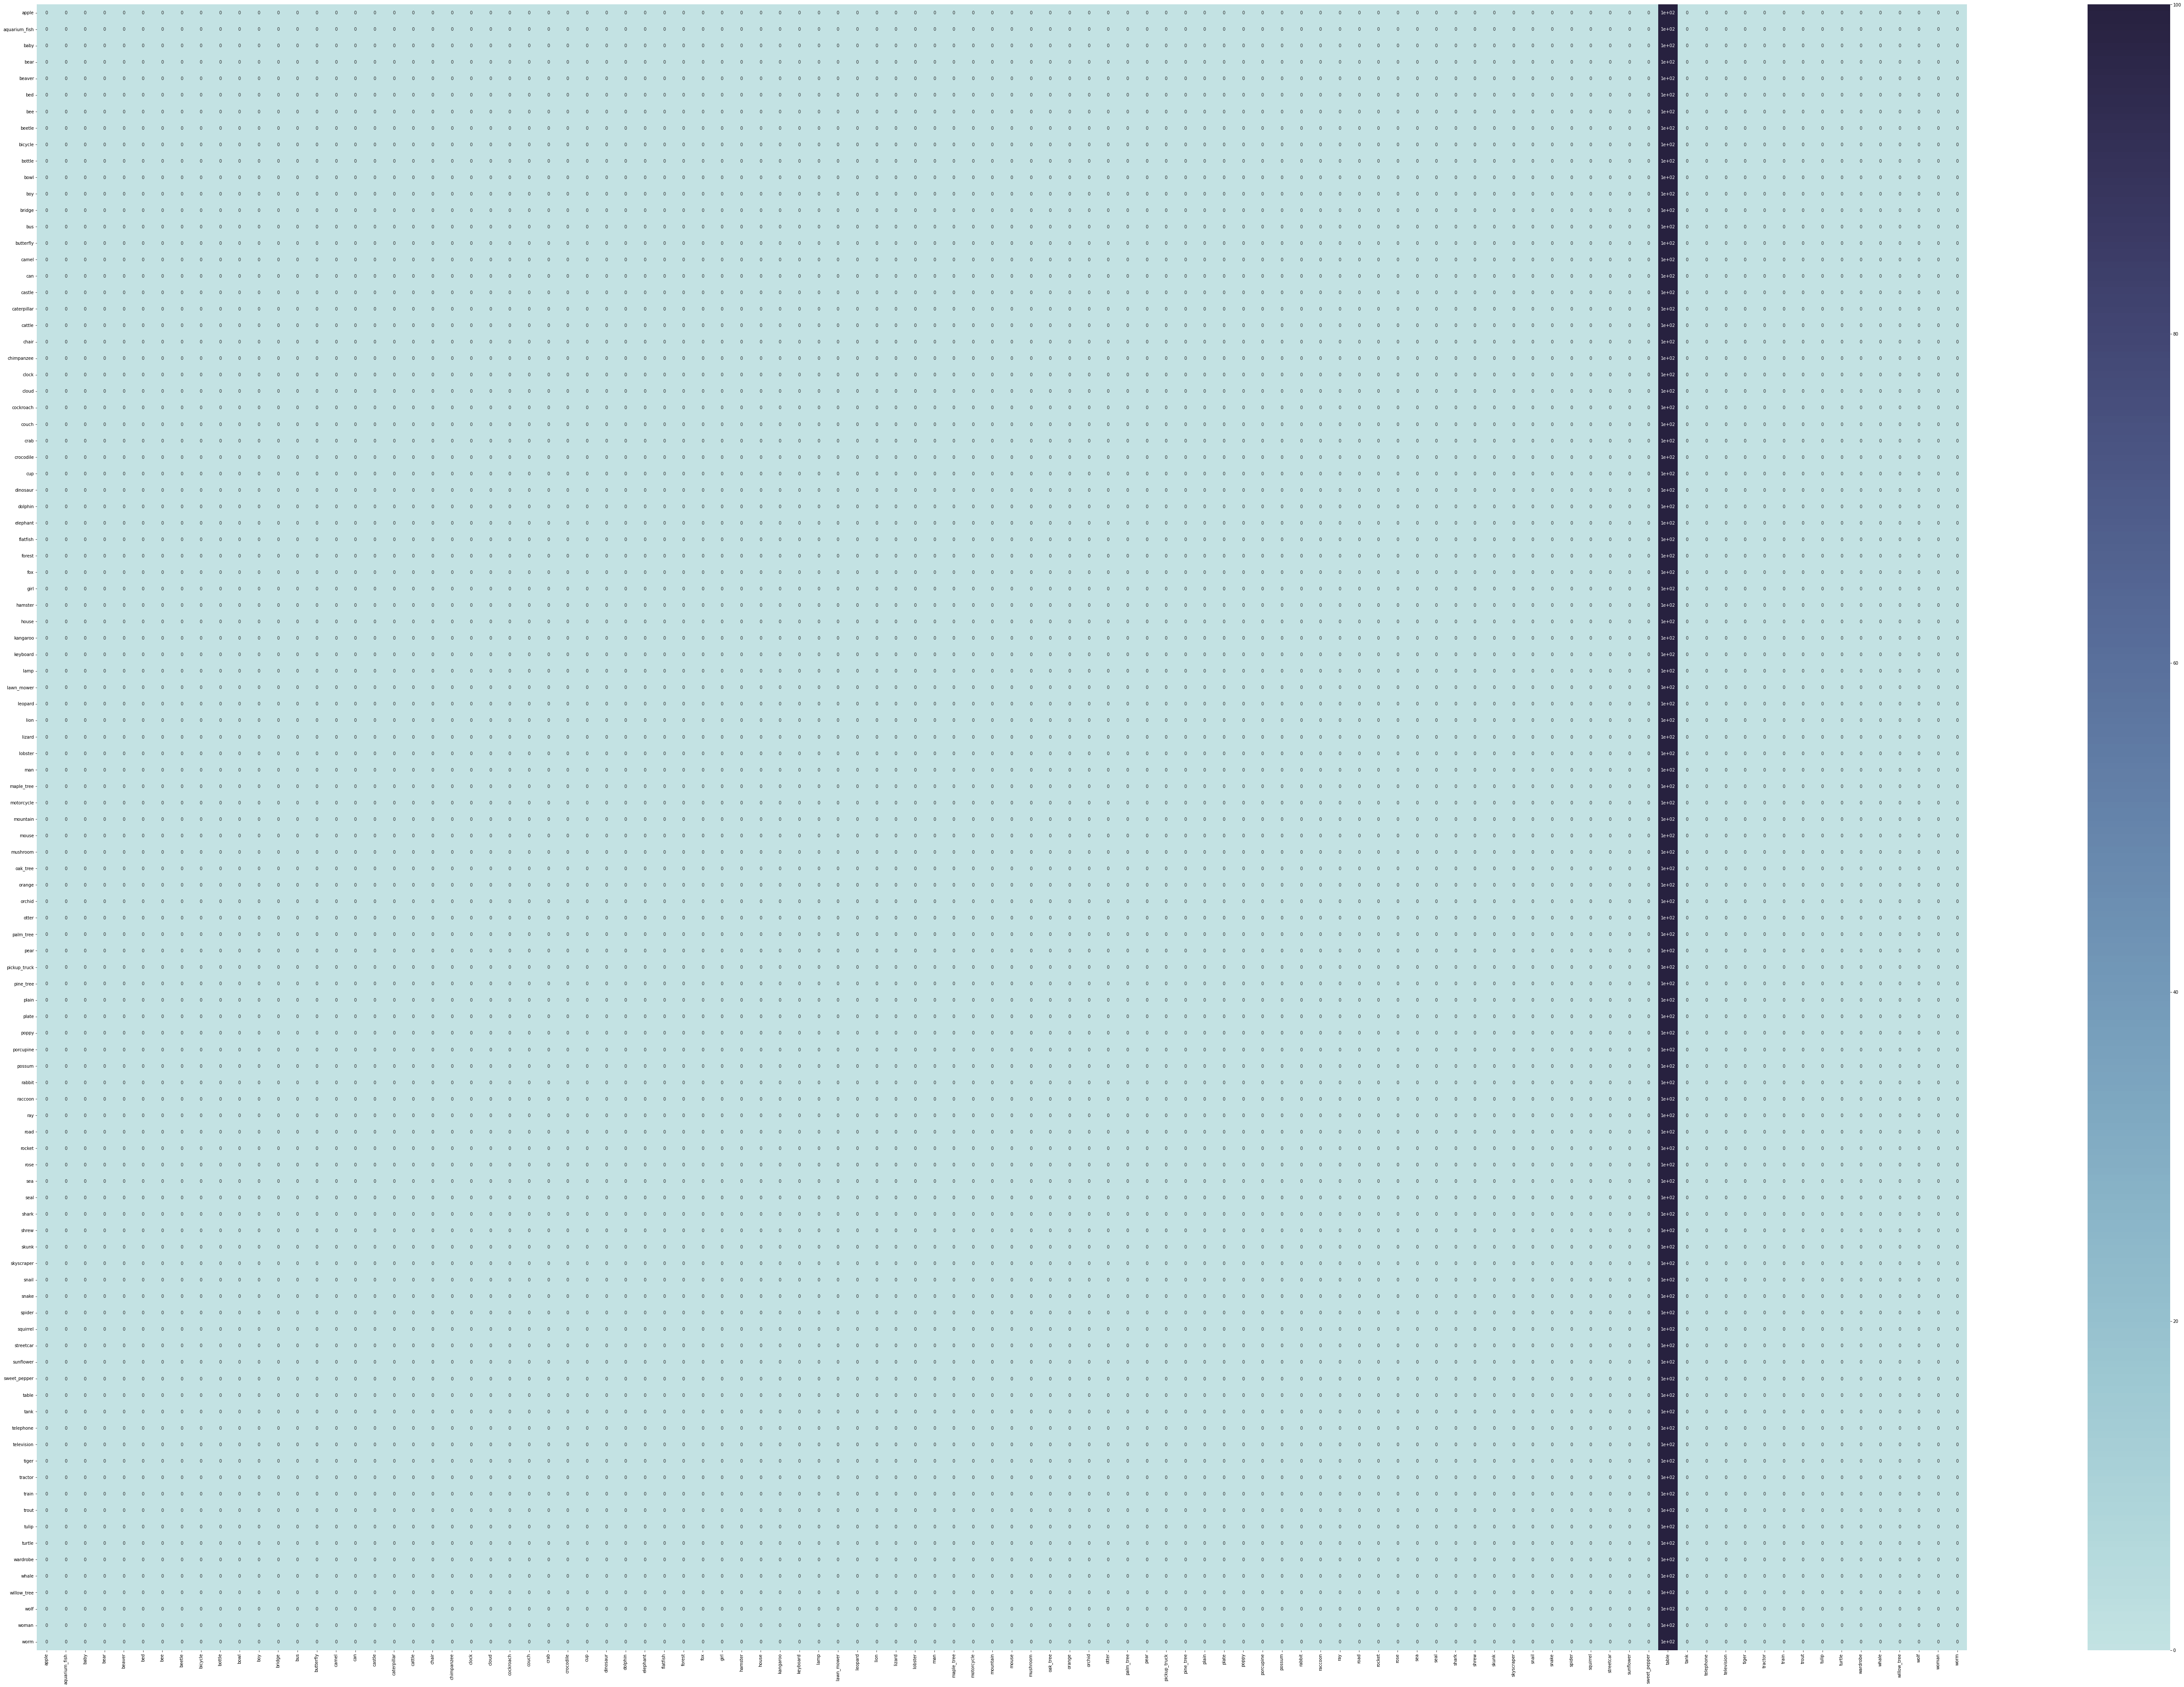

In [13]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (100,70))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()